In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # Import accuracy_score from sklearn
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import numpy as np
from tqdm import trange  # Import trange for progress bar during training
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # For scaling


In [19]:
X = np.load('kryptonite-18-X.npy')
y = np.load('kryptonite-18-y.npy')

Using device: cuda


  2%|▏         | 1/50 [00:01<01:31,  1.86s/it]

New best model saved with test loss: 0.6934
Epoch [1/50], Train Loss: 0.6937, Train Accuracy: 49.87%, Test Loss: 0.6934, Test Accuracy: 49.54%


  4%|▍         | 2/50 [00:03<01:28,  1.85s/it]

New best model saved with test loss: 0.6932


  6%|▌         | 3/50 [00:05<01:26,  1.85s/it]

New best model saved with test loss: 0.6932


 22%|██▏       | 11/50 [00:20<01:15,  1.93s/it]

Epoch [11/50], Train Loss: 0.6924, Train Accuracy: 51.43%, Test Loss: 0.6936, Test Accuracy: 49.40%


 26%|██▌       | 13/50 [00:24<01:10,  1.91s/it]

New best model saved with test loss: 0.6291


 28%|██▊       | 14/50 [00:26<01:08,  1.89s/it]

New best model saved with test loss: 0.4899


 30%|███       | 15/50 [00:28<01:05,  1.88s/it]

New best model saved with test loss: 0.3922


 32%|███▏      | 16/50 [00:30<01:03,  1.87s/it]

New best model saved with test loss: 0.3569


 34%|███▍      | 17/50 [00:31<01:01,  1.86s/it]

New best model saved with test loss: 0.3456


 36%|███▌      | 18/50 [00:33<00:59,  1.86s/it]

New best model saved with test loss: 0.3288


 38%|███▊      | 19/50 [00:35<00:57,  1.86s/it]

New best model saved with test loss: 0.3265


 42%|████▏     | 21/50 [00:39<00:53,  1.85s/it]

Epoch [21/50], Train Loss: 0.3197, Train Accuracy: 87.77%, Test Loss: 0.3267, Test Accuracy: 87.32%


 44%|████▍     | 22/50 [00:41<00:51,  1.85s/it]

New best model saved with test loss: 0.3114


 56%|█████▌    | 28/50 [00:52<00:41,  1.88s/it]

New best model saved with test loss: 0.3108


 58%|█████▊    | 29/50 [00:54<00:39,  1.87s/it]

New best model saved with test loss: 0.3066


 62%|██████▏   | 31/50 [00:57<00:35,  1.87s/it]

Epoch [31/50], Train Loss: 0.2950, Train Accuracy: 88.75%, Test Loss: 0.3068, Test Accuracy: 88.68%


 66%|██████▌   | 33/50 [01:01<00:31,  1.87s/it]

New best model saved with test loss: 0.2983


 72%|███████▏  | 36/50 [01:07<00:26,  1.86s/it]

New best model saved with test loss: 0.2819


 74%|███████▍  | 37/50 [01:09<00:24,  1.86s/it]

New best model saved with test loss: 0.2783


 76%|███████▌  | 38/50 [01:10<00:22,  1.86s/it]

New best model saved with test loss: 0.2733


 80%|████████  | 40/50 [01:14<00:18,  1.86s/it]

New best model saved with test loss: 0.2586


 82%|████████▏ | 41/50 [01:16<00:16,  1.87s/it]

Epoch [41/50], Train Loss: 0.2462, Train Accuracy: 91.53%, Test Loss: 0.2716, Test Accuracy: 90.68%


 88%|████████▊ | 44/50 [01:22<00:11,  1.89s/it]

New best model saved with test loss: 0.2571


 90%|█████████ | 45/50 [01:24<00:09,  1.88s/it]

New best model saved with test loss: 0.2529


 92%|█████████▏| 46/50 [01:26<00:07,  1.88s/it]

New best model saved with test loss: 0.2508


 96%|█████████▌| 48/50 [01:29<00:03,  1.87s/it]

New best model saved with test loss: 0.2487


 98%|█████████▊| 49/50 [01:31<00:01,  1.87s/it]

New best model saved with test loss: 0.2462


100%|██████████| 50/50 [01:33<00:00,  1.87s/it]


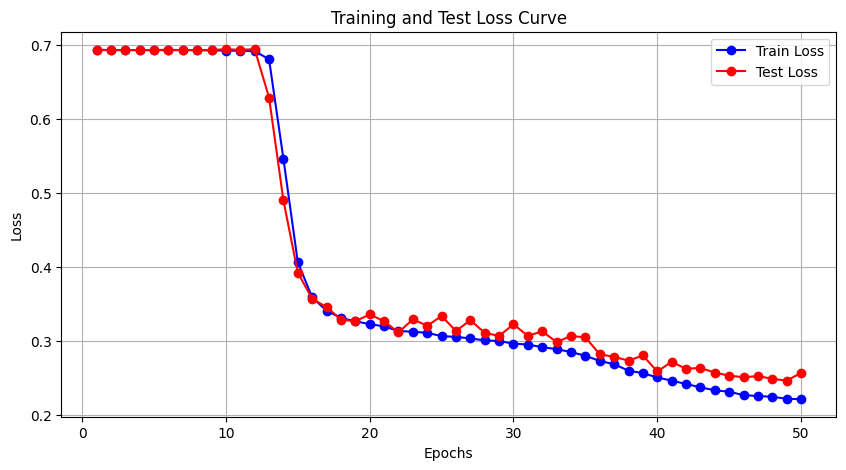

In [20]:
# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define the Neural Network model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()

        self.fc1 = nn.Linear(19, 256)
        self.bn1 = nn.LayerNorm(256)  # Add Batch Normalization
        self.fc2 = nn.Linear(256, 256)
        self.bn2 = nn.LayerNorm(256)   # Add Batch Normalization
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 1)    # Hidden layer (64 neurons) -> Output layer (1 neuron)
        

        # Sigmoid activation for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.nn.functional.gelu(self.bn1(self.fc1(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.bn2(self.fc2(x)))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc3(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc4(x))  # Apply batch normalization before activation
        x = torch.nn.functional.gelu(self.fc5(x))  # Apply batch normalization before activation
        x = self.fc6(x)               # Output layer (logits)
        x = self.sigmoid(x)           # Sigmoid activation to get a value between 0 and 1 (binary classification)
        return x

# Create the model instance and move it to the GPU
model = BinaryClassifier().to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)


# Split the dataset into training and test sets
norms = np.linalg.norm(X, axis=1).reshape(-1, 1)  # Norms as feature
X_train, X_test, y_train, y_test = train_test_split(np.concatenate([X, norms], axis=1), y, test_size=0.2, random_state=42)

# Standardization (zero mean, unit variance)
scaler = StandardScaler()  # Or you can use MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert them into PyTorch tensors (ensure float32 for targets) and move to GPU
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)  # Ensure float32 type for BCE loss

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Create DataLoader for training and test datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Store loss values for plotting
train_losses = []
test_losses = []

# Initialize a variable to track the best test loss
best_test_loss = float('inf')  # Start with a very high value
best_model_path = 'best_model_n18.pt'  # Path to save the best model

# Training Loop
epochs = 50
for epoch in trange(epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    all_preds_train = []  # List to store predictions for accuracy
    all_labels_train = []  # List to store true labels for accuracy

    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, targets)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Track the loss for logging
        running_loss += loss.item()

        # Collect predictions and labels for accuracy calculation
        all_preds_train.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
        all_labels_train.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_train = np.concatenate(all_preds_train, axis=0)
    all_labels_train = np.concatenate(all_labels_train, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    train_accuracy = accuracy_score(all_labels_train, all_preds_train)

    # Test loop
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    all_preds_test = []  # List to store predictions for accuracy
    all_labels_test = []  # List to store true labels for accuracy

    with torch.no_grad():  # No need to compute gradients for testing
        for inputs, targets in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss += loss.item()

            # Collect predictions and labels for accuracy calculation
            all_preds_test.append((outputs > 0.5).cpu().numpy())  # Convert predictions to binary (0 or 1)
            all_labels_test.append(targets.cpu().numpy())

    # Flatten the lists to a 1D array for accuracy calculation
    all_preds_test = np.concatenate(all_preds_test, axis=0)
    all_labels_test = np.concatenate(all_labels_test, axis=0)

    # Calculate accuracy using sklearn's accuracy_score
    test_accuracy = accuracy_score(all_labels_test, all_preds_test)

    # Store losses for plotting
    train_losses.append(running_loss / len(train_loader))  # Average loss for training set
    test_losses.append(test_loss / len(test_loader))  # Average loss for test set

    # Check if the current test loss is the best we've seen
    if test_loss / len(test_loader) < best_test_loss:
        best_test_loss = test_loss / len(test_loader)
        torch.save(model.state_dict(), best_model_path)  # Save the model parameters
        print(f"New best model saved with test loss: {best_test_loss:.4f}")

    if epoch % 10 == 0:
        # Print loss and accuracy for this epoch
        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy*100:.2f}%, "
              f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy*100:.2f}%")

# Plotting the Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss', color='blue', marker='o')
plt.plot(range(1, epochs + 1), test_losses, label='Test Loss', color='red', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curve')
plt.legend()
plt.grid(True)
plt.show()
